In [ ]:
LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.metrics import r2_score
from sklearn import metrics


LOADING THE DATASET

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving Final Dataset.xlsx - Sheet1.csv to Final Dataset.xlsx - Sheet1.csv


In [ ]:
import io
df_new=pd.read_csv("Final Dataset.xlsx - Sheet1.csv")

FIRST 10 OBSERVATIONS

In [ ]:
df_new.head(10)

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
0,PROD_3,SLSMAN_1,10,2019,80,0
1,PROD_3,SLSMAN_1,11,2019,80,0
2,PROD_3,SLSMAN_1,12,2019,40,0
3,PROD_5,SLSMAN_1,10,2019,160,211
4,PROD_5,SLSMAN_1,11,2019,160,173
5,PROD_5,SLSMAN_1,12,2019,240,175
6,PROD_8,SLSMAN_1,10,2019,0,7
7,PROD_10,SLSMAN_1,10,2019,0,82
8,PROD_10,SLSMAN_1,11,2019,0,79
9,PROD_10,SLSMAN_1,12,2019,0,59


COLUMN NAMES

In [ ]:
df_new.columns

Index(['PROD_CD', 'SLSMAN_CD', 'PLAN_MONTH', 'PLAN_YEAR', 'TARGET_IN_EA',
       'ACH_IN_EA'],
      dtype='object')

CONVERTING CATEGORICAL VARIABLES INTO NUMERICAL VALUES

In [ ]:

Le=preprocessing.LabelEncoder()
df=df_new
df["PROD_CD"]=Le.fit_transform(df_new["PROD_CD"])
df["SLSMAN_CD"]=Le.fit_transform(df_new["SLSMAN_CD"])


REMOVING THE COMAS B/W THE NUMBERS

In [ ]:
df_new['TARGET_IN_EA'] = df_new['TARGET_IN_EA'].str.replace(',', '').astype(float)
df_new['ACH_IN_EA'] = df_new['ACH_IN_EA'].str.replace(',', '').astype(float)

In [ ]:
df_new=df_new.drop(["PLAN_YEAR"],axis=1)


REMOVING OUTLIERS FROM THE DATASET

In [ ]:
from scipy import stats
z = np.abs(stats.zscore(df_new))
print(z)
threshold = 9
end = df_new[(z < 9).all(axis=1)]

[[0.51171738 1.64043602 1.29826521 0.34376698 0.35010729]
 [0.51171738 1.64043602 0.0496255  0.34376698 0.35010729]
 [0.51171738 1.64043602 1.19901422 0.34747329 0.35010729]
 ...
 [1.60115336 0.46094405 1.19901422 0.3511796  0.34973024]
 [1.72792561 0.46094405 0.0496255  0.3511796  0.33860732]
 [1.72792561 0.46094405 1.19901422 0.3511796  0.33031227]]


In [ ]:
end.corr()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,TARGET_IN_EA,ACH_IN_EA
PROD_CD,1.000000,0.007582,0.067888,-0.097324,-0.073687
SLSMAN_CD,0.007582,1.000000,0.002923,0.010748,0.015662
PLAN_MONTH,0.067888,0.002923,1.000000,-0.030547,-0.024380
TARGET_IN_EA,-0.097324,0.010748,-0.030547,1.000000,0.880425
ACH_IN_EA,-0.073687,0.015662,-0.024380,0.880425,1.000000


Applying normalization

In [ ]:
"""def norm_fun(i):
    x=(i-i.min())/(i.max()-(i.min()))
    return(x)"""

In [ ]:
"""predictor=norm_fun(end.iloc[:,0:4])
target=norm_fun(pd.DataFrame(end.iloc[:,4]))"""

Splitting the input variables in a dataframe called predictor and splitting the output variable in a dataframe called output 

In [ ]:
predictor=end.iloc[:,0:4]
target=pd.DataFrame(end.iloc[:,4])

SPLITTNG THE DATA'S

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(predictor,target,test_size=0.2,random_state=0)

MODEL BUILDING USING RANDOMIZED SEARCH CV

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

HYPER PARAMETERS

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

RANDOM FOREST REGRESSOR

In [ ]:
rf = RandomForestRegressor()


ADDING THE HYPER PARAMETERS AND RANDOM FOREST REGRESSOR IN RANDOMIZED SEARCH CV

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

TRAINING THE MODEL(FITTING)

In [ ]:
rf_random.fit(Xtrain,Ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 50.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 92.2min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

CHECKING THE SCORE FOR TRAIN AND TEST

Train score

In [ ]:
rf_random.score(Xtrain,Ytrain)

0.9792913460098631

Test score

In [ ]:
rf_random.score(Xtest,Ytest)

0.9010418240664319

Prediction

In [ ]:
predicted=rf_random.predict(Xtest)

MODEL EVALUATION

R^2 VALUE

In [ ]:
R2_value=r2_score(Ytest,predicted)
print(R2_value)

0.9010418240664317


RMSE

In [ ]:
Rmse = (np.sqrt(mean_squared_error(Ytest, predicted)))
print(Rmse)

2829.2753553891707


MSE

In [ ]:
metrics.mean_squared_error(Ytest,predicted)

8004799.036612517

MEAN ABSOLUTE ERROR

In [ ]:
metrics.mean_absolute_error(Ytest,predicted)

956.9937003683842

SCATTER PLOT FOR PEDICTED VALUE V/S ACTUAL

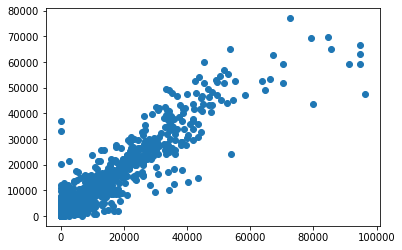

In [ ]:
import matplotlib.pyplot as plt 
plt.scatter(Ytest,predicted)

Creating a list for all salesman

In [ ]:
salesman=['SLSMAN_1', 'SLSMAN_2', 'SLSMAN_3', 'SLSMAN_4', 'SLSMAN_5',
       'SLSMAN_6', 'SLSMAN_7', 'SLSMAN_8', 'SLSMAN_9', 'SLSMAN_10',
       'SLSMAN_11', 'SLSMAN_12', 'SLSMAN_13', 'SLSMAN_14', 'SLSMAN_15',
       'SLSMAN_16', 'SLSMAN_17', 'SLSMAN_18', 'SLSMAN_19', 'SLSMAN_20',
       'SLSMAN_21', 'SLSMAN_22', 'SLSMAN_23', 'SLSMAN_24', 'SLSMAN_25',
       'SLSMAN_26', 'SLSMAN_27', 'SLSMAN_28', 'SLSMAN_29', 'SLSMAN_30',
       'SLSMAN_31', 'SLSMAN_32', 'SLSMAN_33', 'SLSMAN_34', 'SLSMAN_35',
       'SLSMAN_36', 'SLSMAN_37', 'SLSMAN_38', 'SLSMAN_39', 'SLSMAN_40',
       'SLSMAN_41', 'SLSMAN_42', 'SLSMAN_43', 'SLSMAN_44', 'SLSMAN_45',
       'SLSMAN_46', 'SLSMAN_47', 'SLSMAN_48', 'SLSMAN_49', 'SLSMAN_50',
       'SLSMAN_51', 'SLSMAN_52', 'SLSMAN_53', 'SLSMAN_54', 'SLSMAN_55',
       'SLSMAN_56', 'SLSMAN_57', 'SLSMAN_58', 'SLSMAN_59', 'SLSMAN_60',
       'SLSMAN_61', 'SLSMAN_62', 'SLSMAN_63', 'SLSMAN_64', 'SLSMAN_65',
       'SLSMAN_66', 'SLSMAN_67', 'SLSMAN_68', 'SLSMAN_69', 'SLSMAN_70',
       'SLSMAN_71', 'SLSMAN_73', 'SLSMAN_74', 'SLSMAN_75', 'SLSMAN_76',
       'SLSMAN_77', 'SLSMAN_78', 'SLSMAN_79', 'SLSMAN_80', 'SLSMAN_81',
       'SLSMAN_82', 'SLSMAN_83', 'SLSMAN_84', 'SLSMAN_85', 'SLSMAN_86',
       'SLSMAN_87', 'SLSMAN_88', 'SLSMAN_89', 'SLSMAN_90', 'SLSMAN_91',
       'SLSMAN_92', 'SLSMAN_93', 'SLSMAN_94', 'SLSMAN_95', 'SLSMAN_96',
       'SLSMAN_97', 'SLSMAN_98', 'SLSMAN_99', 'SLSMAN_100', 'SLSMAN_101',
       'SLSMAN_102', 'SLSMAN_103', 'SLSMAN_104', 'SLSMAN_105',
       'SLSMAN_106', 'SLSMAN_107', 'SLSMAN_108', 'SLSMAN_109',
       'SLSMAN_110', 'SLSMAN_111', 'SLSMAN_112', 'SLSMAN_113',
       'SLSMAN_114', 'SLSMAN_115', 'SLSMAN_116', 'SLSMAN_117',
       'SLSMAN_118', 'SLSMAN_119', 'SLSMAN_120', 'SLSMAN_121',
       'SLSMAN_122', 'SLSMAN_123', 'SLSMAN_124', 'SLSMAN_125',
       'SLSMAN_126', 'SLSMAN_127', 'SLSMAN_128', 'SLSMAN_129',
       'SLSMAN_130', 'SLSMAN_131', 'SLSMAN_132', 'SLSMAN_133',
       'SLSMAN_134', 'SLSMAN_135', 'SLSMAN_136', 'SLSMAN_137',
       'SLSMAN_138', 'SLSMAN_139', 'SLSMAN_140', 'SLSMAN_141',
       'SLSMAN_142', 'SLSMAN_143', 'SLSMAN_144', 'SLSMAN_145',
       'SLSMAN_146', 'SLSMAN_147', 'SLSMAN_148', 'SLSMAN_149',
       'SLSMAN_150', 'SLSMAN_151', 'SLSMAN_152', 'SLSMAN_153',
       'SLSMAN_154', 'SLSMAN_155', 'SLSMAN_156', 'SLSMAN_157',
       'SLSMAN_158', 'SLSMAN_159', 'SLSMAN_160', 'SLSMAN_161',
       'SLSMAN_162', 'SLSMAN_163', 'SLSMAN_164', 'SLSMAN_165',
       'SLSMAN_166', 'SLSMAN_167', 'SLSMAN_168', 'SLSMAN_169',
       'SLSMAN_170', 'SLSMAN_171', 'SLSMAN_172', 'SLSMAN_173',
       'SLSMAN_174', 'SLSMAN_175', 'SLSMAN_176', 'SLSMAN_177',
       'SLSMAN_178', 'SLSMAN_179', 'SLSMAN_180', 'SLSMAN_181',
       'SLSMAN_182', 'SLSMAN_183', 'SLSMAN_184', 'SLSMAN_185',
       'SLSMAN_186', 'SLSMAN_187', 'SLSMAN_188', 'SLSMAN_189',
       'SLSMAN_190', 'SLSMAN_191', 'SLSMAN_192', 'SLSMAN_193',
       'SLSMAN_194', 'SLSMAN_195', 'SLSMAN_196', 'SLSMAN_197',
       'SLSMAN_198', 'SLSMAN_199', 'SLSMAN_200', 'SLSMAN_201',
       'SLSMAN_202', 'SLSMAN_203', 'SLSMAN_204', 'SLSMAN_205',
       'SLSMAN_206', 'SLSMAN_207', 'SLSMAN_208', 'SLSMAN_209',
       'SLSMAN_210', 'SLSMAN_211', 'SLSMAN_212', 'SLSMAN_213',
       'SLSMAN_214', 'SLSMAN_215', 'SLSMAN_216', 'SLSMAN_217',
       'SLSMAN_218', 'SLSMAN_219', 'SLSMAN_220', 'SLSMAN_221',
       'SLSMAN_222', 'SLSMAN_223', 'SLSMAN_224', 'SLSMAN_225']

Creating a list for all products

In [ ]:
product=['PROD_3', 'PROD_5', 'PROD_8', 'PROD_10', 'PROD_11', 'PROD_13',
       'PROD_14', 'PROD_15', 'PROD_16', 'PROD_17', 'PROD_18', 'PROD_19',
       'PROD_21', 'PROD_22', 'PROD_23', 'PROD_25', 'PROD_26', 'PROD_27',
       'PROD_31', 'PROD_32', 'PROD_33', 'PROD_35', 'PROD_36', 'PROD_37',
       'PROD_38', 'PROD_39', 'PROD_42', 'PROD_43', 'PROD_45', 'PROD_47',
       'PROD_48', 'PROD_50', 'PROD_51', 'PROD_56', 'PROD_58', 'PROD_59',
       'PROD_61', 'PROD_62', 'PROD_66', 'PROD_74', 'PROD_76', 'PROD_80',
       'PROD_81', 'PROD_82', 'PROD_83', 'PROD_84', 'PROD_85', 'PROD_86',
       'PROD_49', 'PROD_9', 'PROD_12', 'PROD_53', 'PROD_55', 'PROD_57',
       'PROD_63', 'PROD_64', 'PROD_4', 'PROD_20', 'PROD_28', 'PROD_54',
       'PROD_67', 'PROD_52', 'PROD_68', 'PROD_2', 'PROD_46', 'PROD_70',
       'PROD_75', 'PROD_73', 'PROD_40', 'PROD_71', 'PROD_24', 'PROD_34',
       'PROD_44', 'PROD_41', 'PROD_65', 'PROD_77', 'PROD_79', 'PROD_69',
       'PROD_72', 'PROD_1', 'PROD_78', 'PROD_60', 'PROD_29', 'PROD_6',
       'PROD_7', 'PROD_30']

Creating an array for predicting the achievement for a particular salesman

In [ ]:
def predict_achievment(PROD ,SLSMAN ,PLAN_MONTH,TARGET_IN_EA):
  PROD_CD = product.index(PROD)
  SLSMAN_CD= salesman.index(SLSMAN)
  x= np.zeros(len(predictor.columns))
  x[0]= PROD_CD
  x[1]= SLSMAN_CD
  x[2]=PLAN_MONTH
  x[3]=TARGET_IN_EA
  #x= norm_fun(x)
  print(x)
  pred=rf_random.predict([x])[0]
  return pred


In [ ]:
predict_achievment("PROD_15","SLSMAN_1",10,16260)


[7.000e+00 0.000e+00 1.000e+01 1.626e+04]


15356.907358541943

Saving the Model

In [ ]:
import pickle


In [ ]:
# Save the Modle to file in the current working directory
Model = "Random.pkl"  
with open(Model, 'wb') as file:  
    pickle.dump(rf_random, file)

In [ ]:
# Load the Model back from file
with open(Model, 'rb') as file:  
    Target_Model = pickle.load(file)

Target_Model

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

LOADING THE VALIDAION DATASET

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving Validation Dataset.xlsx - Sheet1.csv to Validation Dataset.xlsx - Sheet1.csv


In [ ]:
import io
test=pd.read_csv("Validation Dataset.xlsx - Sheet1.csv")

REMOVING THE COMA'S B/W THE NUMBERS FROM "TARGET IN EA" VARIABLE

In [ ]:
test['TARGET_IN_EA'] = test['TARGET_IN_EA'].str.replace(',', '').astype(float)


CONVERTING CATEGORICAL VARIABLES INTO NUMERICAL VALUES

In [ ]:
Le=preprocessing.LabelEncoder()
test["PROD_CD"]=Le.fit_transform(test["PROD_CD"])
test["SLSMAN_CD"]=Le.fit_transform(test["SLSMAN_CD"])


DROPING PLAN YEAR AND ACHIEVMENT FROM THE DATASET

In [ ]:
test=test.drop("PLAN_YEAR",axis=1)
test=test.drop("ACH_IN_EA",axis=1)

PREDICTING THE FEBRUARY MONTH TARGET FOR EACH AND  EVERY SALESMAN BASED ON THEIR PREVIOUS MONTH SALES

In [ ]:
valid_pred=Target_Model.predict(test)

In [ ]:
valid_pred

array([ 119.43978134,  241.99252374,  499.03591706, ..., 3606.27439768,
        823.61225427,  284.39255177])

CONVERING THE PREDICTED RESULT INTO A DATAFRAME

In [ ]:
final=pd.DataFrame(valid_pred)

APPENDING THE PREDICTED RESULT TO THE VALIDATION DATASET

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving Validation Dataset.xlsx - Sheet1.csv to Validation Dataset.xlsx - Sheet1 (1).csv


In [ ]:
import io
validation=pd.read_csv("Validation Dataset.xlsx - Sheet1.csv")

In [ ]:
validation.columns

Index(['PROD_CD', 'SLSMAN_CD', 'PLAN_MONTH', 'PLAN_YEAR', 'TARGET_IN_EA',
       'ACH_IN_EA'],
      dtype='object')

In [ ]:
validation=validation.drop("ACH_IN_EA",axis=1)

In [ ]:
Finaldata=pd.concat([validation,final],axis=1)

CHANGING THE COLUMN NAME FOR PREDICTED VARIABLE

In [ ]:
Finaldata = Finaldata.rename(columns = {0 : "Target for feb" }) 


FIRST 30 OBSERVATIONS OF FINAL DATA

In [ ]:
Finaldata.head(30)

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,Target for feb
0,PROD_3,SLSMAN_1,1,2020,40,119.439781
1,PROD_5,SLSMAN_1,1,2020,240,241.992524
2,PROD_11,SLSMAN_1,1,2020,360,499.035917
3,PROD_13,SLSMAN_1,1,2020,"12,816",11192.787226
4,PROD_14,SLSMAN_1,1,2020,"44,460",43315.931009
5,PROD_15,SLSMAN_1,1,2020,"15,012",15271.963420
6,PROD_16,SLSMAN_1,1,2020,"2,268",3347.735300
7,PROD_17,SLSMAN_1,1,2020,"22,320",23970.563872
8,PROD_18,SLSMAN_1,1,2020,"9,300",7618.464049
9,PROD_19,SLSMAN_1,1,2020,"19,320",14290.474199


CONVERTING THE FILE INTO CSV FORMAT

In [ ]:
Finaldata.to_csv("Finaldata.csv")

In [ ]:
!

Making an array function for valiadtion dataset

In [ ]:
Products= ['PROD_3', 'PROD_5', 'PROD_11', 'PROD_13', 'PROD_14', 'PROD_15',
       'PROD_16', 'PROD_17', 'PROD_18', 'PROD_19', 'PROD_22', 'PROD_23',
       'PROD_25', 'PROD_26', 'PROD_27', 'PROD_31', 'PROD_32', 'PROD_33',
       'PROD_35', 'PROD_36', 'PROD_37', 'PROD_38', 'PROD_39', 'PROD_42',
       'PROD_45', 'PROD_47', 'PROD_50', 'PROD_56', 'PROD_58', 'PROD_59',
       'PROD_61', 'PROD_62', 'PROD_80', 'PROD_21', 'PROD_81', 'PROD_20',
       'PROD_28', 'PROD_43', 'PROD_51', 'PROD_54', 'PROD_82', 'PROD_83',
       'PROD_52', 'PROD_4', 'PROD_48', 'PROD_12', 'PROD_6', 'PROD_7',
       'PROD_53', 'PROD_55', 'PROD_57', 'PROD_60', 'PROD_70', 'PROD_75',
       'PROD_78', 'PROD_79', 'PROD_8', 'PROD_30']

In [ ]:
Salesman= ['SLSMAN_1', 'SLSMAN_2', 'SLSMAN_3', 'SLSMAN_4', 'SLSMAN_5',
       'SLSMAN_6', 'SLSMAN_7', 'SLSMAN_8', 'SLSMAN_9', 'SLSMAN_10',
       'SLSMAN_11', 'SLSMAN_12', 'SLSMAN_13', 'SLSMAN_14', 'SLSMAN_15',
       'SLSMAN_16', 'SLSMAN_17', 'SLSMAN_18', 'SLSMAN_19', 'SLSMAN_21',
       'SLSMAN_23', 'SLSMAN_25', 'SLSMAN_27', 'SLSMAN_29', 'SLSMAN_30',
       'SLSMAN_31', 'SLSMAN_32', 'SLSMAN_33', 'SLSMAN_34', 'SLSMAN_35',
       'SLSMAN_36', 'SLSMAN_37', 'SLSMAN_38', 'SLSMAN_39', 'SLSMAN_40',
       'SLSMAN_41', 'SLSMAN_42', 'SLSMAN_43', 'SLSMAN_44', 'SLSMAN_45',
       'SLSMAN_46', 'SLSMAN_47', 'SLSMAN_48', 'SLSMAN_49', 'SLSMAN_50',
       'SLSMAN_51', 'SLSMAN_52', 'SLSMAN_53', 'SLSMAN_54', 'SLSMAN_56',
       'SLSMAN_57', 'SLSMAN_58', 'SLSMAN_60', 'SLSMAN_62', 'SLSMAN_64',
       'SLSMAN_66', 'SLSMAN_68', 'SLSMAN_70', 'SLSMAN_73', 'SLSMAN_74',
       'SLSMAN_75', 'SLSMAN_79', 'SLSMAN_80', 'SLSMAN_81', 'SLSMAN_82',
       'SLSMAN_83', 'SLSMAN_84', 'SLSMAN_85', 'SLSMAN_86', 'SLSMAN_87',
       'SLSMAN_88', 'SLSMAN_89', 'SLSMAN_90', 'SLSMAN_91', 'SLSMAN_92',
       'SLSMAN_93', 'SLSMAN_94', 'SLSMAN_95', 'SLSMAN_96', 'SLSMAN_97',
       'SLSMAN_98', 'SLSMAN_99', 'SLSMAN_100', 'SLSMAN_101', 'SLSMAN_102',
       'SLSMAN_103', 'SLSMAN_104', 'SLSMAN_105', 'SLSMAN_106',
       'SLSMAN_107', 'SLSMAN_108', 'SLSMAN_109', 'SLSMAN_110',
       'SLSMAN_111', 'SLSMAN_112', 'SLSMAN_113', 'SLSMAN_114',
       'SLSMAN_115', 'SLSMAN_117', 'SLSMAN_119', 'SLSMAN_121',
       'SLSMAN_122', 'SLSMAN_123', 'SLSMAN_124', 'SLSMAN_125',
       'SLSMAN_126', 'SLSMAN_127', 'SLSMAN_128', 'SLSMAN_129',
       'SLSMAN_130', 'SLSMAN_131', 'SLSMAN_132', 'SLSMAN_134',
       'SLSMAN_136', 'SLSMAN_138', 'SLSMAN_139', 'SLSMAN_140',
       'SLSMAN_141', 'SLSMAN_142', 'SLSMAN_143', 'SLSMAN_144',
       'SLSMAN_146', 'SLSMAN_148', 'SLSMAN_150', 'SLSMAN_152',
       'SLSMAN_154', 'SLSMAN_156', 'SLSMAN_158', 'SLSMAN_159',
       'SLSMAN_160', 'SLSMAN_161', 'SLSMAN_162', 'SLSMAN_163',
       'SLSMAN_164', 'SLSMAN_165', 'SLSMAN_166', 'SLSMAN_168',
       'SLSMAN_169', 'SLSMAN_170', 'SLSMAN_171', 'SLSMAN_172',
       'SLSMAN_173', 'SLSMAN_174', 'SLSMAN_176', 'SLSMAN_178',
       'SLSMAN_180', 'SLSMAN_181', 'SLSMAN_182', 'SLSMAN_183',
       'SLSMAN_184', 'SLSMAN_185', 'SLSMAN_186', 'SLSMAN_190',
       'SLSMAN_191', 'SLSMAN_192', 'SLSMAN_193', 'SLSMAN_194',
       'SLSMAN_195', 'SLSMAN_196', 'SLSMAN_197', 'SLSMAN_198',
       'SLSMAN_199', 'SLSMAN_200', 'SLSMAN_201', 'SLSMAN_202',
       'SLSMAN_204', 'SLSMAN_206', 'SLSMAN_208', 'SLSMAN_209',
       'SLSMAN_210', 'SLSMAN_211', 'SLSMAN_212', 'SLSMAN_213',
       'SLSMAN_214', 'SLSMAN_215', 'SLSMAN_216', 'SLSMAN_217']

In [ ]:
def predict_achievment(PRODUCT ,SALESMAN ,PLAN_MONTH,TARGET_IN_EA):

  Products= ['PROD_3', 'PROD_5', 'PROD_11', 'PROD_13', 'PROD_14', 'PROD_15',
       'PROD_16', 'PROD_17', 'PROD_18', 'PROD_19', 'PROD_22', 'PROD_23',
       'PROD_25', 'PROD_26', 'PROD_27', 'PROD_31', 'PROD_32', 'PROD_33',
       'PROD_35', 'PROD_36', 'PROD_37', 'PROD_38', 'PROD_39', 'PROD_42',
       'PROD_45', 'PROD_47', 'PROD_50', 'PROD_56', 'PROD_58', 'PROD_59',
       'PROD_61', 'PROD_62', 'PROD_80', 'PROD_21', 'PROD_81', 'PROD_20',
       'PROD_28', 'PROD_43', 'PROD_51', 'PROD_54', 'PROD_82', 'PROD_83',
       'PROD_52', 'PROD_4', 'PROD_48', 'PROD_12', 'PROD_6', 'PROD_7',
       'PROD_53', 'PROD_55', 'PROD_57', 'PROD_60', 'PROD_70', 'PROD_75',
       'PROD_78', 'PROD_79', 'PROD_8', 'PROD_30']
  Salesman= ['SLSMAN_1', 'SLSMAN_2', 'SLSMAN_3', 'SLSMAN_4', 'SLSMAN_5',
       'SLSMAN_6', 'SLSMAN_7', 'SLSMAN_8', 'SLSMAN_9', 'SLSMAN_10',
       'SLSMAN_11', 'SLSMAN_12', 'SLSMAN_13', 'SLSMAN_14', 'SLSMAN_15',
       'SLSMAN_16', 'SLSMAN_17', 'SLSMAN_18', 'SLSMAN_19', 'SLSMAN_21',
       'SLSMAN_23', 'SLSMAN_25', 'SLSMAN_27', 'SLSMAN_29', 'SLSMAN_30',
       'SLSMAN_31', 'SLSMAN_32', 'SLSMAN_33', 'SLSMAN_34', 'SLSMAN_35',
       'SLSMAN_36', 'SLSMAN_37', 'SLSMAN_38', 'SLSMAN_39', 'SLSMAN_40',
       'SLSMAN_41', 'SLSMAN_42', 'SLSMAN_43', 'SLSMAN_44', 'SLSMAN_45',
       'SLSMAN_46', 'SLSMAN_47', 'SLSMAN_48', 'SLSMAN_49', 'SLSMAN_50',
       'SLSMAN_51', 'SLSMAN_52', 'SLSMAN_53', 'SLSMAN_54', 'SLSMAN_56',
       'SLSMAN_57', 'SLSMAN_58', 'SLSMAN_60', 'SLSMAN_62', 'SLSMAN_64',
       'SLSMAN_66', 'SLSMAN_68', 'SLSMAN_70', 'SLSMAN_73', 'SLSMAN_74',
       'SLSMAN_75', 'SLSMAN_79', 'SLSMAN_80', 'SLSMAN_81', 'SLSMAN_82',
       'SLSMAN_83', 'SLSMAN_84', 'SLSMAN_85', 'SLSMAN_86', 'SLSMAN_87',
       'SLSMAN_88', 'SLSMAN_89', 'SLSMAN_90', 'SLSMAN_91', 'SLSMAN_92',
       'SLSMAN_93', 'SLSMAN_94', 'SLSMAN_95', 'SLSMAN_96', 'SLSMAN_97',
       'SLSMAN_98', 'SLSMAN_99', 'SLSMAN_100', 'SLSMAN_101', 'SLSMAN_102',
       'SLSMAN_103', 'SLSMAN_104', 'SLSMAN_105', 'SLSMAN_106',
       'SLSMAN_107', 'SLSMAN_108', 'SLSMAN_109', 'SLSMAN_110',
       'SLSMAN_111', 'SLSMAN_112', 'SLSMAN_113', 'SLSMAN_114',
       'SLSMAN_115', 'SLSMAN_117', 'SLSMAN_119', 'SLSMAN_121',
       'SLSMAN_122', 'SLSMAN_123', 'SLSMAN_124', 'SLSMAN_125',
       'SLSMAN_126', 'SLSMAN_127', 'SLSMAN_128', 'SLSMAN_129',
       'SLSMAN_130', 'SLSMAN_131', 'SLSMAN_132', 'SLSMAN_134',
       'SLSMAN_136', 'SLSMAN_138', 'SLSMAN_139', 'SLSMAN_140',
       'SLSMAN_141', 'SLSMAN_142', 'SLSMAN_143', 'SLSMAN_144',
       'SLSMAN_146', 'SLSMAN_148', 'SLSMAN_150', 'SLSMAN_152',
       'SLSMAN_154', 'SLSMAN_156', 'SLSMAN_158', 'SLSMAN_159',
       'SLSMAN_160', 'SLSMAN_161', 'SLSMAN_162', 'SLSMAN_163',
       'SLSMAN_164', 'SLSMAN_165', 'SLSMAN_166', 'SLSMAN_168',
       'SLSMAN_169', 'SLSMAN_170', 'SLSMAN_171', 'SLSMAN_172',
       'SLSMAN_173', 'SLSMAN_174', 'SLSMAN_176', 'SLSMAN_178',
       'SLSMAN_180', 'SLSMAN_181', 'SLSMAN_182', 'SLSMAN_183',
       'SLSMAN_184', 'SLSMAN_185', 'SLSMAN_186', 'SLSMAN_190',
       'SLSMAN_191', 'SLSMAN_192', 'SLSMAN_193', 'SLSMAN_194',
       'SLSMAN_195', 'SLSMAN_196', 'SLSMAN_197', 'SLSMAN_198',
       'SLSMAN_199', 'SLSMAN_200', 'SLSMAN_201', 'SLSMAN_202',
       'SLSMAN_204', 'SLSMAN_206', 'SLSMAN_208', 'SLSMAN_209',
       'SLSMAN_210', 'SLSMAN_211', 'SLSMAN_212', 'SLSMAN_213',
       'SLSMAN_214', 'SLSMAN_215', 'SLSMAN_216', 'SLSMAN_217']

  PROD_CD = Products.index(PRODUCT)
  SLSMAN_CD= Salesman.index(SALESMAN)
  x= np.zeros(len(test.columns))
  x[0]= PROD_CD
  x[1]= SLSMAN_CD
  x[2]=PLAN_MONTH
  x[3]=TARGET_IN_EA
  print(x)
  pred=Target_Model.predict([x])[0]
  return pred

In [ ]:
predict_achievment("PROD_15","SLSMAN_1",1,15555)

[5.0000e+00 0.0000e+00 1.0000e+00 1.5555e+04]


16147.342289965984